# Stock Price Prediction – Machine Learning Project in Python
https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

we will be talking about predicting the returns on stocks. This is a very complex task and has uncertainties. We will develop this project into two parts:

1. First, we will learn how to predict stock price using the LSTM neural network.

2. Then we will build a dashboard using Plotly dash for stock analysis.

# Stock Price Prediction Project
## Datasets
1. To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India: Tata Global Dataset (https://data-flair.training/blogs/download-tata-global-beverages-stocks-data/)

2. To develop the dashboard for stock analysis we will use another stock dataset with multiple stocks like Apple, Microsoft, Facebook: Stocks Dataset Source Code (https://data-flair.training/blogs/download-stocks-price-data/)

Before proceeding ahead, please download the source code: Stock Price Prediction Project (https://data-flair.training/blogs/download-stock-price-prediction-project-code/)

## Stock price prediction using LSTM
1. Imports:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

2024-11-12 02:01:29.696575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)

# Create a new DataFrame with 'Date' and 'Close' columns
new_dataset = df[['Date', 'Close']]

# Set 'Date' as the index
new_dataset.set_index('Date', inplace=True)
new_dataset.head()

,Close
Date,
2013-10-08,155.80
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


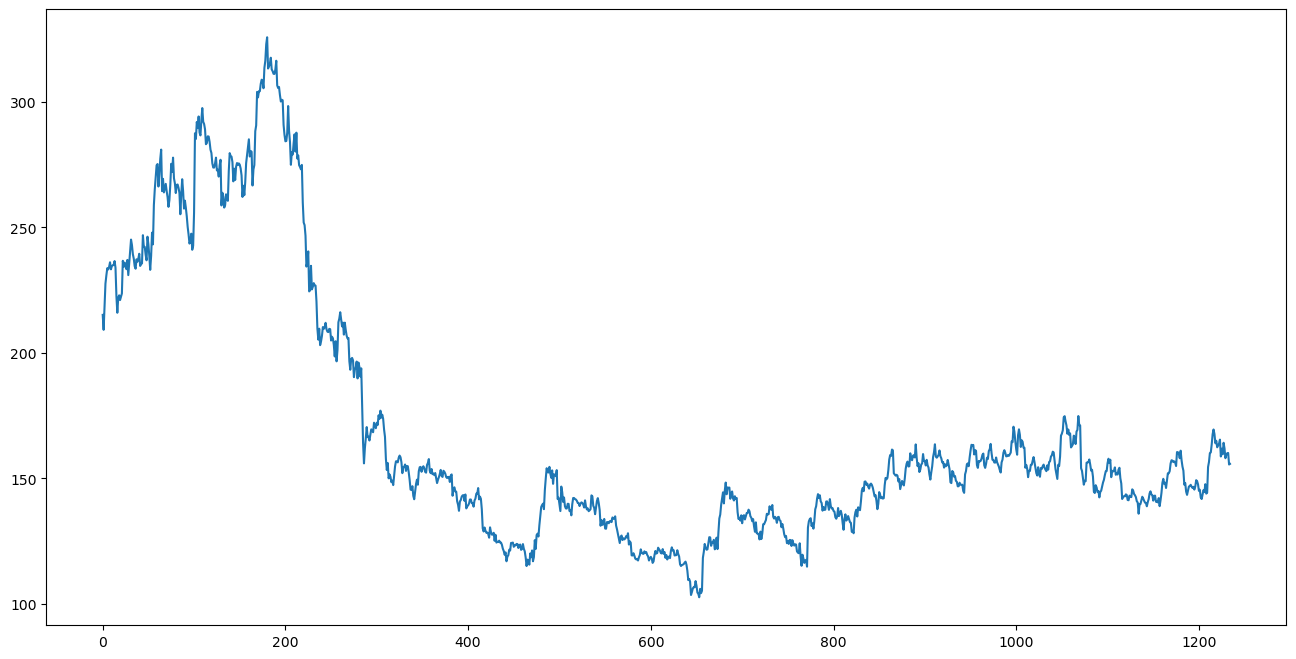

In [4]:
plt.figure(figsize = (16,8))
plt.plot(df["Close"], label = 'Close Price history')

In [5]:
# Convert to numpy array and normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]  # Using sample indices, adjust as needed
valid_data = final_dataset[987:, :]

scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

print(x_train_data)
print(y_train_data)

[[[0.23823398]
  [0.2371134 ]
  [0.25773196]
  ...
  [0.25907665]
  [0.25930076]
  [0.23442403]]

 [[0.2371134 ]
  [0.25773196]
  [0.25728373]
  ...
  [0.25930076]
  [0.23442403]
  [0.24069924]]

 [[0.25773196]
  [0.25728373]
  [0.25459435]
  ...
  [0.23442403]
  [0.24069924]
  [0.24271627]]

 ...

 [[0.24697445]
  [0.28641865]
  [0.29964142]
  ...
  [0.45047064]
  [0.46234872]
  [0.46526221]]

 [[0.28641865]
  [0.29964142]
  [0.31869117]
  ...
  [0.46234872]
  [0.46526221]
  [0.45853877]]

 [[0.29964142]
  [0.31869117]
  [0.32608696]
  ...
  [0.46526221]
  [0.45853877]
  [0.4787091 ]]]
[0.24069924 0.24271627 0.24137158 0.24406096 0.2447333  0.23890632
 0.22523532 0.22142537 0.22142537 0.20797848 0.19520394 0.20461676
 0.20259973 0.21156432 0.20416853 0.18646347 0.17346481 0.16270731
 0.17705065 0.16943075 0.17189601 0.17055132 0.18153294 0.18108472
 0.17256835 0.1824294  0.18354998 0.18915285 0.18556701 0.17525773
 0.16987898 0.16248319 0.16831017 0.16898252 0.17234424 0.17637831
 0.1

In [6]:
# 6. Build and train the LSTM model:

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 49s - loss: 0.0013 - 49s/epoch - 53ms/step


In [7]:
# 7. Take a sample of a dataset to make stock price predictions using the LSTM model:

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 2s 38ms/step


In [8]:
# 8. Save the LSTM model:

lstm_model.save("saved_model.h5")

/Users/embaby/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/var/folders/_f/0510p3m15lq81353t0_pmp8m0000gn/T/ipykernel_42772/2866249073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


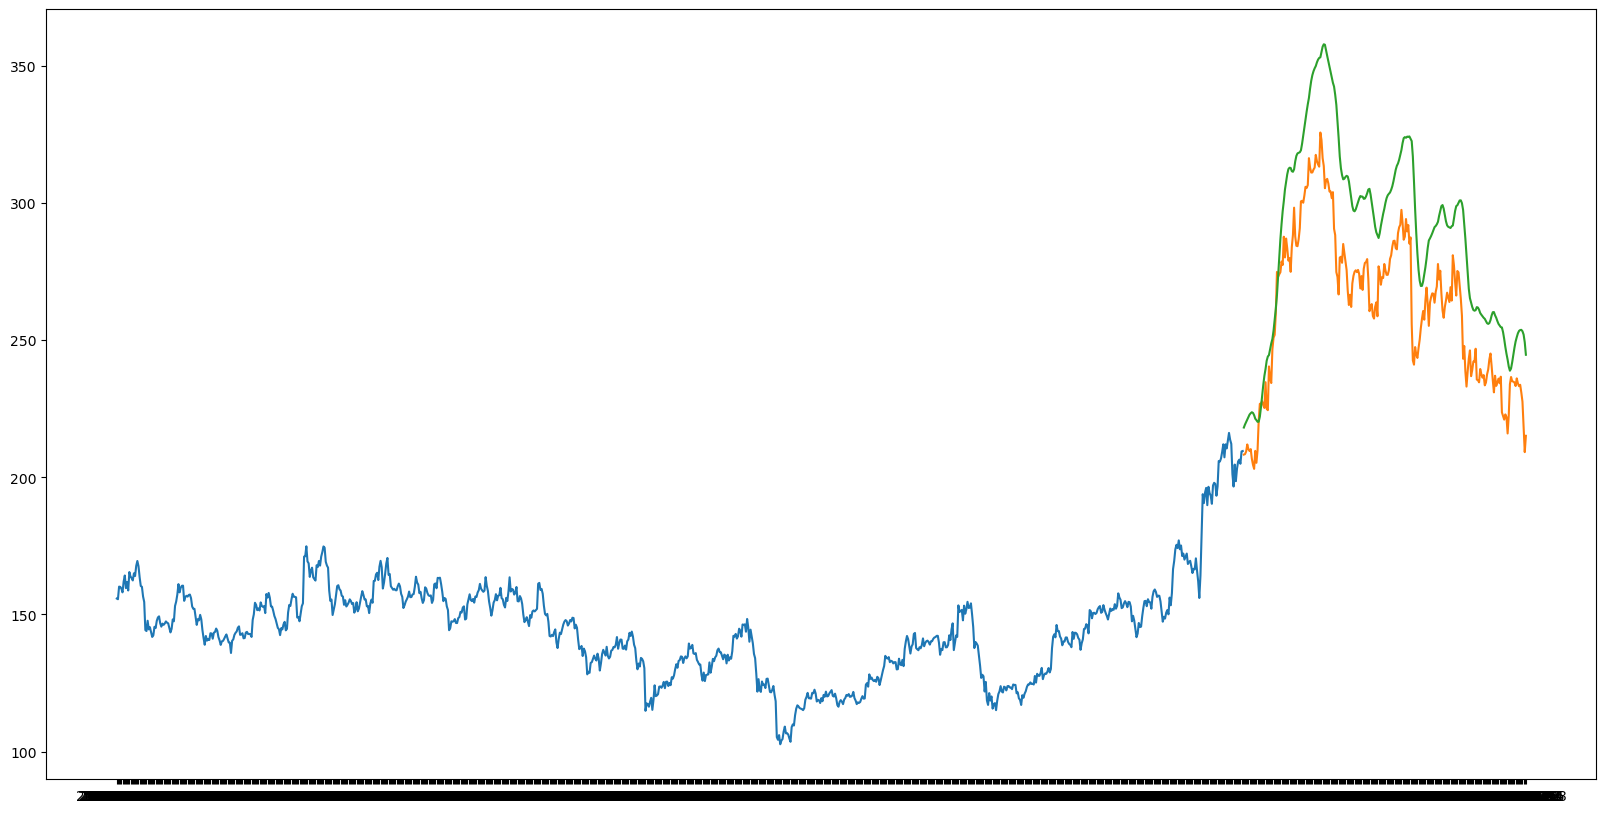

In [9]:
# 9. Visualize the predicted stock costs with actual stock costs:

train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])